In [2]:
# Given a list of book titles, access the google API and return the respective authors of each book.
import json
from urllib.request import urlopen
import ethnicolr
import pandas as pd
api = "https://www.googleapis.com/books/v1/volumes?q=title:"
import csv
import numpy as np
import matplotlib.pyplot as plt


In [3]:
def getBookInfo(title):
    title = title.replace(' ', '%')
    url = api + title
    response = urlopen(url)
    data = json.loads(response.read())
    return data

## Setting up
Getting the api keys and access initialized

In [4]:
title = ['How to Invent Everything','Percy Jackson','Oxford Dictionary']
namesDF = pd.DataFrame()
for bookTitle in title:
    bookInfo =getBookInfo(bookTitle)['items'][0]['volumeInfo']
    author = bookInfo['authors'][0].split(' ')
    lastName = author[-1]
    firstName = author[0]
    # Taking the first result for the search query which is index 0, getting information about the book and then printing the author of the book.
    namesDF = namesDF.append({'Title':bookTitle,'last':lastName,'first': firstName},ignore_index=True)

namesDF = namesDF.append({'first':'Azal','last':'Amer'},ignore_index=True)
namesDF = namesDF.append({'first':'Madison','last':'rojas'},ignore_index=True)
namesDF = namesDF.append({'first':'Shreeya','last':'Madhavanur'},ignore_index=True)
namesDF = namesDF.append({'first':'Teja','last':'Mettu'},ignore_index=True)
namesDF = namesDF.append({'first':'Demarcus','last':'Powell'},ignore_index=True)
namesDF = namesDF.append({'first':'Areeba','last':'Amer'},ignore_index=True)
namesDF = namesDF.append({'first':'Areeba','last':'Amer'},ignore_index=True)
namesDF = namesDF.append({'first':'Angela','last':'Kamgange'},ignore_index=True)
namesDF = namesDF.append({'first':'Jonny','last':'Villa'},ignore_index=True)


## Trying API's for name-ethnicity prediction
The winner is.... the Wikipedia Full name model!

In [ ]:
ethnicity = ethnicolr.pred_wiki_name(namesDF,'last','first')
merged = pd.concat([namesDF,ethnicity['race']],axis = 1)
merged.drop(['last','first','rowindex','Title'],axis = 1,inplace = True)
print(merged)

In [ ]:
import requests
# https://namsor.app/api-documentation.html?python#namsor-api
# Okay the issue with namsoor is that I can only analyze 500 names monthly, then I need to pay for a higher plan.
url = "https://v2.namsor.com/NamSorAPIv2/api2/json/origin/Angela/Kamgange"
headers = {
 "Accept": "application/json",
 "X-API-KEY": "88cb4dfd3faea7d4379fafc2eb3dca9e"
}

response = requests.request("GET", url, headers=headers)

print(response.json()['countryOrigin'])

In [ ]:
classOf2023= pd.read_csv('Student Directory.csv')
frontRemove = len('Options \r\n Message \r\n Add to Contacts \r\n Contact Card')
def formatName(string):
    string = str(string)
    string = string.split('Add to Contacts')[1]
    string = string.split('Contact Card')
    if(len(string)>1):
        string = string[1]
    else:
        string = string[0]
    string = str(string).split('\'23')[0]
    string = string[1:]
    string = string[:-1]
    
    return string
list = classOf2023[classOf2023.columns[1]].tolist()
formattedlist = []
for name in list:
    formatted = formatName(name).split(' ')
    formatted = [formatted[0],formatted[-1]]
    formattedlist.append(formatted)
i=0
classOf2023 = pd.DataFrame(formattedlist,columns = ['first','last'])
classOf2023.to_csv('classOf2023.csv')

In [ ]:
ethnicity = ethnicolr.pred_wiki_name(classOf2023,'last','first')


In [8]:
ethnicolr.pred_wiki_name(namesDF,'last','first')


['Asian,GreaterEastAsian,EastAsian', 'Asian,GreaterEastAsian,Japanese', 'Asian,IndianSubContinent', 'GreaterAfrican,Africans', 'GreaterAfrican,Muslim', 'GreaterEuropean,British', 'GreaterEuropean,EastEuropean', 'GreaterEuropean,Jewish', 'GreaterEuropean,WestEuropean,French', 'GreaterEuropean,WestEuropean,Germanic', 'GreaterEuropean,WestEuropean,Hispanic', 'GreaterEuropean,WestEuropean,Italian', 'GreaterEuropean,WestEuropean,Nordic']


,Title,last,first,__name,rowindex,"Asian,GreaterEastAsian,EastAsian_mean","Asian,GreaterEastAsian,EastAsian_std","Asian,GreaterEastAsian,EastAsian_lb","Asian,GreaterEastAsian,EastAsian_ub","Asian,GreaterEastAsian,Japanese_mean",...,"GreaterEuropean,WestEuropean,Hispanic_ub","GreaterEuropean,WestEuropean,Italian_mean","GreaterEuropean,WestEuropean,Italian_std","GreaterEuropean,WestEuropean,Italian_lb","GreaterEuropean,WestEuropean,Italian_ub","GreaterEuropean,WestEuropean,Nordic_mean","GreaterEuropean,WestEuropean,Nordic_std","GreaterEuropean,WestEuropean,Nordic_lb","GreaterEuropean,WestEuropean,Nordic_ub",race
0,How to Invent Everything,North,Ryan,North Ryan,0,0.006632,0.006927,0.000824,0.001034,0.007212,...,0.002993,0.020266,0.014940,0.003729,0.004907,0.015206,0.014339,1.009849e-03,1.016177e-03,"GreaterEuropean,British"
1,Percy Jackson,Riordan,Rick,Riordan Rick,1,0.022439,0.013332,0.005088,0.005345,0.016149,...,0.003931,0.025939,0.017427,0.005419,0.005886,0.003980,0.003243,4.376156e-04,6.075278e-04,"GreaterEuropean,British"
2,Oxford Dictionary,Simpson,John,Simpson John,2,0.005912,0.002951,0.001947,0.001994,0.001967,...,0.001118,0.007947,0.005131,0.001860,0.002119,0.004976,0.005289,3.177486e-04,5.360365e-04,"GreaterEuropean,British"
3,NaN,Amer,Azal,Amer Azal,3,0.000723,0.000550,0.000032,0.000043,0.000207,...,0.006274,0.003707,0.002184,0.000290,0.000760,0.021859,0.015124,1.343433e-03,2.683103e-03,"GreaterAfrican,Muslim"
4,NaN,rojas,Madison,Rojas Madison,4,0.003402,0.003584,0.000480,0.000524,0.050674,...,0.531308,0.009693,0.017816,0.000658,0.000804,0.000999,0.002434,1.205648e-05,2.157083e-05,"GreaterEuropean,WestEuropean,Hispanic"
5,NaN,Madhavanur,Shreeya,Madhavanur Shreeya,5,0.000233,0.000200,0.000022,0.000031,0.000022,...,0.000106,0.000052,0.000089,0.000002,0.000002,0.000010,0.000024,9.274435e-08,2.242249e-07,"Asian,IndianSubContinent"
6,NaN,Mettu,Teja,Mettu Teja,6,0.002875,0.006653,0.000103,0.000107,0.008591,...,0.009703,0.007716,0.011996,0.000246,0.000310,0.027818,0.045736,2.428831e-04,2.913310e-04,"Asian,IndianSubContinent"
7,NaN,Powell,Demarcus,Powell Demarcus,7,0.001763,0.001387,0.000379,0.000416,0.001059,...,0.001646,0.014660,0.010342,0.003450,0.003709,0.004023,0.004378,1.782469e-04,2.459595e-04,"GreaterEuropean,British"
8,NaN,Amer,Areeba,Amer Areeba,8,0.006135,0.005289,0.000966,0.000981,0.006079,...,0.001904,0.003860,0.002908,0.000396,0.000465,0.001852,0.004171,8.749446e-05,8.976756e-05,"GreaterAfrican,Africans"
9,NaN,Amer,Areeba,Amer Areeba,9,0.006268,0.005704,0.000741,0.000757,0.005797,...,0.001862,0.004296,0.003404,0.000306,0.000555,0.001806,0.002893,5.358452e-05,9.449695e-05,"GreaterAfrican,Africans"


,Title,last,first,__name,rowindex,"Asian,GreaterEastAsian,EastAsian_mean","Asian,GreaterEastAsian,EastAsian_std","Asian,GreaterEastAsian,EastAsian_lb","Asian,GreaterEastAsian,EastAsian_ub","Asian,GreaterEastAsian,Japanese_mean",...,"GreaterEuropean,WestEuropean,Hispanic_ub","GreaterEuropean,WestEuropean,Italian_mean","GreaterEuropean,WestEuropean,Italian_std","GreaterEuropean,WestEuropean,Italian_lb","GreaterEuropean,WestEuropean,Italian_ub","GreaterEuropean,WestEuropean,Nordic_mean","GreaterEuropean,WestEuropean,Nordic_std","GreaterEuropean,WestEuropean,Nordic_lb","GreaterEuropean,WestEuropean,Nordic_ub",race
0,How to Invent Everything,North,Ryan,North Ryan,0,0.005260,0.003349,0.000809,0.000870,0.006138,...,0.003181,0.020410,0.012741,0.005044,0.005332,0.016047,0.016902,6.646486e-04,1.601751e-03,"GreaterEuropean,British"
1,Percy Jackson,Riordan,Rick,Riordan Rick,1,0.020820,0.010470,0.003545,0.005065,0.014954,...,0.003800,0.025605,0.020598,0.005695,0.007168,0.003624,0.002795,6.565885e-04,6.748514e-04,"GreaterEuropean,British"
2,Oxford Dictionary,Simpson,John,Simpson John,2,0.005908,0.003151,0.001173,0.001818,0.001887,...,0.001096,0.007971,0.004940,0.001154,0.001831,0.005799,0.009456,4.405451e-04,4.493671e-04,"GreaterEuropean,British"
3,NaN,Amer,Azal,Amer Azal,3,0.000688,0.000658,0.000036,0.000061,0.000213,...,0.003972,0.004210,0.003943,0.000711,0.000775,0.019750,0.014998,3.634179e-03,4.369278e-03,"GreaterAfrican,Muslim"
4,NaN,rojas,Madison,Rojas Madison,4,0.003923,0.004186,0.000139,0.000234,0.052631,...,0.637008,0.009729,0.013558,0.000980,0.001034,0.000907,0.001428,1.783452e-05,2.488942e-05,"GreaterEuropean,WestEuropean,Hispanic"
5,NaN,Madhavanur,Shreeya,Madhavanur Shreeya,5,0.000305,0.000346,0.000016,0.000018,0.000023,...,0.000080,0.000165,0.000991,0.000003,0.000003,0.000013,0.000028,1.625834e-07,2.055954e-07,"Asian,IndianSubContinent"
6,NaN,Mettu,Teja,Mettu Teja,6,0.004106,0.016030,0.000015,0.000043,0.007135,...,0.005236,0.005637,0.006766,0.000205,0.000299,0.025977,0.059635,1.860730e-04,2.694367e-04,"Asian,IndianSubContinent"
7,NaN,Powell,Demarcus,Powell Demarcus,7,0.001509,0.000887,0.000324,0.000393,0.000950,...,0.001932,0.014329,0.009552,0.002663,0.003113,0.003583,0.003005,4.240273e-04,4.613447e-04,"GreaterEuropean,British"
8,NaN,Amer,Areeba,Amer Areeba,8,0.005807,0.004434,0.000301,0.000445,0.005930,...,0.003321,0.004165,0.003785,0.000534,0.000700,0.001409,0.001534,1.108892e-04,1.356232e-04,"GreaterAfrican,Africans"
9,NaN,Amer,Areeba,Amer Areeba,9,0.005764,0.004107,0.000496,0.000793,0.006901,...,0.003073,0.004193,0.003706,0.000381,0.000440,0.001203,0.001588,9.751882e-05,1.710207e-04,"GreaterAfrican,Africans"


In [281]:
def plotMerged(ethnicity,title):
    merged = pd.concat([classOf2023,ethnicity['race']],axis = 1)
    merged.drop(['last','first'],axis = 1,inplace = True)
    merged['race']=merged['race'].str.split(',',expand = False)
    # Okay what I need to do is go through all the lists in race, and if it contains hispanic, make that the value
    for i,race in enumerate(merged['race'].tolist()):
        if('Hispanic' in race):
            merged['race'][i] = 'hispanic'
        else:
            merged['race'][i]= merged['race'][i][0]
    
    fig, ax = plt.subplots(figsize = (5,5))
    plt.subplot(1, 2, 1)
    merged['race'].value_counts().plot.pie(autopct='%1.1f%%')
    fig.set_facecolor('lightgrey')
    plt.title(title)
    return merged

In [ ]:
ethnicity1 = ethnicolr.pred_wiki_ln(classOf2023,'last',num_iter=100, conf_int=0.9)


In [ ]:
ethnicityCensusFull = ethnicolr.pred_census_ln(classOf2023,'last',year = 2010)


In [ ]:
ethnicityFLlast = ethnicolr.pred_fl_reg_ln(classOf2023, 'last', num_iter=100, conf_int=0.9)
ethnicityFLlast = ethnicityFLlast.rename(columns = {'true_race':'race'})

In [ ]:
ethnicityFlfull = ethnicolr.pred_fl_reg_name(classOf2023, 'last','first', num_iter=100, conf_int=0.9)
ethnicityFLlast =  ethnicityFlfull.rename(columns = {'true_race':'race'})

In [ ]:

plotMerged(ethnicity1,'Wikipedia Last Name Source Estimate')
plotMerged(ethnicity,'Wikipedia Full Name Source Estimate')
plotMerged(ethnicityCensusFull,'Cencus Last Name Source Estimate')
plotMerged(ethnicityFLlast,'Florida Last name Estimate')
plotMerged(ethnicityFlfull,'Florida Full Name Estimate')

Text(0.5, 1.0, 'Actual Data')

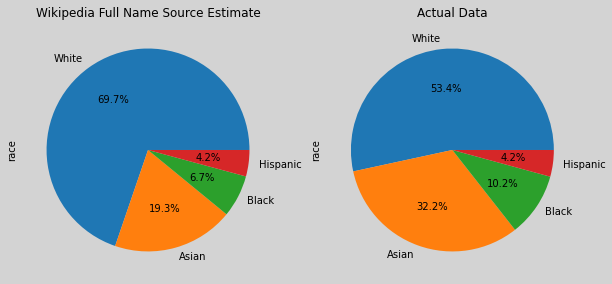

In [299]:
merged = pd.concat([classOf2023,ethnicity['race']],axis = 1)
merged.drop(['last','first'],axis = 1,inplace = True)
merged['race']=merged['race'].str.split(',',expand = False)
# Okay what I need to do is go through all the lists in race, and if it contains hispanic, make that the value
for i,race in enumerate(merged['race'].tolist()):
    if('Hispanic' in race):
        merged['race'][i] = 'hispanic'
    else:
        merged['race'][i]= merged['race'][i][0]



fig, ax = plt.subplots(nrows=1, ncols=2,figsize = (10,10))

plt.subplot(1, 2, 1)
merged['race'] = merged['race'].replace({'GreaterEuropean':'White', 'GreaterAfrican':'Black','hispanic':'Hispanic','a':'Asian'})

merged['race'].value_counts().plot.pie(autopct='%1.1f%%')
fig.set_facecolor('lightgrey')
plt.title('Wikipedia Full Name Source Estimate') # index 2

df = pd.read_csv('classOf2023.csv')
plt.subplot(1, 2, 2)
df['race'] = df['race'].replace({'w':'White', 'b':'Black','h':'Hispanic','a':'Asian'})
df['race'].value_counts().plot.pie(autopct='%1.1f%%')

fig.set_facecolor('lightgrey')
plt.title('Actual Data')
